# Product Sales Analysis

# Project Overview
This project focuses on analyzing customer purchasing trends and behaviors to provide valuable insights into sales patterns. The client is particularly interested in customer segmentation and their chip purchasing behavior to optimize marketing strategies and inventory management.

# Objectives
Understand customer purchasing trends.
Identify key customer segments.
Analyze chip purchasing behavior.
Provide actionable insights based on sales data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_transaction = pd.read_excel("C:/Users/Hairav/Downloads/QVI_transaction_data.xlsx")
df_transaction.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


In [137]:
df_purchase= pd.read_csv("C:/Users/Hairav/Downloads/QVI_purchase_behaviour.csv")
df_purchase.head(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream


# Data Exploration

Transaction Table

In [138]:
df_transaction.shape

(264397, 11)

In [139]:
# Checking Null Values
df_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
FINAL_SALES       0
year              0
month             0
dtype: int64

In [140]:
df_transaction.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'FINAL_SALES', 'year', 'month'],
      dtype='object')

In [141]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264397 entries, 0 to 264835
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264397 non-null  datetime64[ns]
 1   STORE_NBR       264397 non-null  int64         
 2   LYLTY_CARD_NBR  264397 non-null  int64         
 3   TXN_ID          264397 non-null  int64         
 4   PROD_NBR        264397 non-null  int64         
 5   PROD_NAME       264397 non-null  object        
 6   PROD_QTY        264397 non-null  int64         
 7   TOT_SALES       264397 non-null  float64       
 8   FINAL_SALES     264397 non-null  float64       
 9   year            264397 non-null  int32         
 10  month           264397 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(5), object(1)
memory usage: 22.2+ MB


In [142]:
df_transaction["TOT_SALES"].max()

16.5

In [143]:
df_transaction["PROD_QTY"].max()

5

In [144]:
df_transaction[df_transaction["TOT_SALES"]==df_transaction["TOT_SALES"].max()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,FINAL_SALES,year,month
165,2019-05-17,222,222209,222693,40,Thins Chips Seasonedchicken 175g,5,16.5,82.5,2019,5
55330,2019-05-17,70,70183,68553,28,Thins Potato Chips Hot & Spicy 175g,5,16.5,82.5,2019,5
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5,82.5,2018,8
69719,2018-08-15,195,195123,194950,44,Thins Chips Light& Tangy 175g,5,16.5,82.5,2018,8
80649,2018-08-18,10,10249,10498,78,Thins Chips Salt & Vinegar 175g,5,16.5,82.5,2018,8
80662,2019-05-17,17,17325,15105,40,Thins Chips Seasonedchicken 175g,5,16.5,82.5,2019,5
80769,2018-08-15,66,66073,63336,78,Thins Chips Salt & Vinegar 175g,5,16.5,82.5,2018,8
80829,2018-08-15,81,81307,81094,40,Thins Chips Seasonedchicken 175g,5,16.5,82.5,2018,8
81224,2019-05-17,217,217183,217138,44,Thins Chips Light& Tangy 175g,5,16.5,82.5,2019,5
99458,2018-08-17,138,138085,141016,40,Thins Chips Seasonedchicken 175g,5,16.5,82.5,2018,8


In [145]:
# Checking Outliers
df_transaction[df_transaction["TOT_SALES"]<0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,FINAL_SALES,year,month


In [146]:
avg,std=df_transaction["TOT_SALES"].mean(),df_transaction["TOT_SALES"].std()

In [147]:
higher_limit = avg+3*std
higher_limit

14.66671520181196

In [148]:
lower_limit= avg-3*std
lower_limit

-0.11334205461286206

In [149]:
# Checking Outliers
df_transaction[df_transaction["TOT_SALES"]>=higher_limit]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,FINAL_SALES,year,month
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,75.0,2018,8
31,2019-05-15,43,43227,40186,26,Pringles Sweet&Spcy BBQ 134g,4,14.8,59.2,2019,5
56,2019-05-16,74,74336,73182,84,GrnWves Plus Btroot & Chilli Jam 180g,5,15.5,77.5,2019,5
124,2019-05-17,168,168219,170719,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,4,15.2,60.8,2019,5
165,2019-05-17,222,222209,222693,40,Thins Chips Seasonedchicken 175g,5,16.5,82.5,2019,5
...,...,...,...,...,...,...,...,...,...,...,...
258630,2019-05-15,84,84217,83871,109,Pringles Barbeque 134g,4,14.8,59.2,2019,5
258632,2019-05-17,88,88142,86924,78,Thins Chips Salt & Vinegar 175g,5,16.5,82.5,2019,5
258659,2018-08-18,123,123246,127077,104,Infuzions Thai SweetChili PotatoMix 110g,4,15.2,60.8,2018,8
258726,2018-08-20,203,203253,203360,28,Thins Potato Chips Hot & Spicy 175g,5,16.5,82.5,2018,8


In [150]:
# Checking Oulier
df_transaction[df_transaction["TOT_SALES"]<=lower_limit]
# No outliers for lower_limit

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,FINAL_SALES,year,month


In [151]:
# We need to remove outliers
df_transaction = df_transaction[df_transaction["TOT_SALES"]<=higher_limit]

In [152]:
# Outlier removed
df_transaction.shape

(264218, 11)

In [153]:
df_transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,FINAL_SALES,year,month
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,12.0,2018,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,18.9,2019,5
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5.8,2019,5
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,41.4,2018,8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,5.1,2019,5


Purchase Table

In [154]:
df_purchase.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [155]:
df_purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# Data Cleaning and Data Transformation

In [156]:
df_transaction.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,FINAL_SALES,year,month
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,12.0,2018,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,18.9,2019,5


In [157]:
# We need to add another column final_sales (prod_qty*tot_sales)
df_transaction["FINAL_SALES"]=df_transaction["PROD_QTY"]*df_transaction["TOT_SALES"]

C:\Users\Hairav\AppData\Local\Temp\ipykernel_16240\2253052664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction["FINAL_SALES"]=df_transaction["PROD_QTY"]*df_transaction["TOT_SALES"]


In [158]:
df_transaction.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,FINAL_SALES,year,month
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,12.0,2018,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,18.9,2019,5


In [159]:
# Checking total store
total_store = len(df_transaction["STORE_NBR"].unique())

So the total number number of store is 272

In [160]:
# And we also want analyze sales and prod_qty based on year, So we need to add year column in transaction table

In [161]:
df_transaction["year"]=df_transaction["DATE"].dt.year

C:\Users\Hairav\AppData\Local\Temp\ipykernel_16240\4191827654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction["year"]=df_transaction["DATE"].dt.year


# First we want to analyze prod_qty, total_sales and final_Sales year wise.

In [162]:
year_product = df_transaction.groupby("year")["PROD_QTY"].sum()

In [163]:
year_product

year
2018    253480
2019    248523
Name: PROD_QTY, dtype: int64

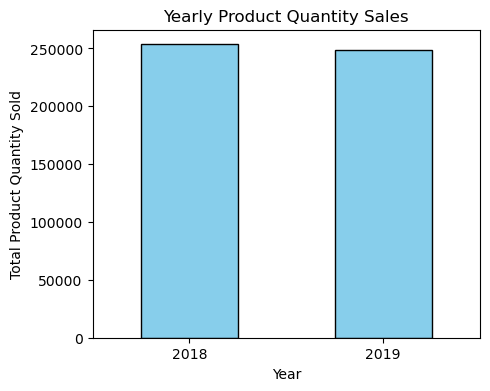

In [164]:
plt.figure(figsize=(5,4))
year_product.plot(kind="bar",color='skyblue', edgecolor='black')

plt.xlabel("Year")
plt.ylabel("Total Product Quantity Sold")
plt.title("Yearly Product Quantity Sales")
plt.xticks(rotation=0) 
plt.show()

# As we observe, sales in 2018 are higher compared to 2019.

In [165]:
df_transaction["month"] = df_transaction["DATE"].dt.month

C:\Users\Hairav\AppData\Local\Temp\ipykernel_16240\66855128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction["month"] = df_transaction["DATE"].dt.month


Let's analyze the quantity of sales on a monthly basis.

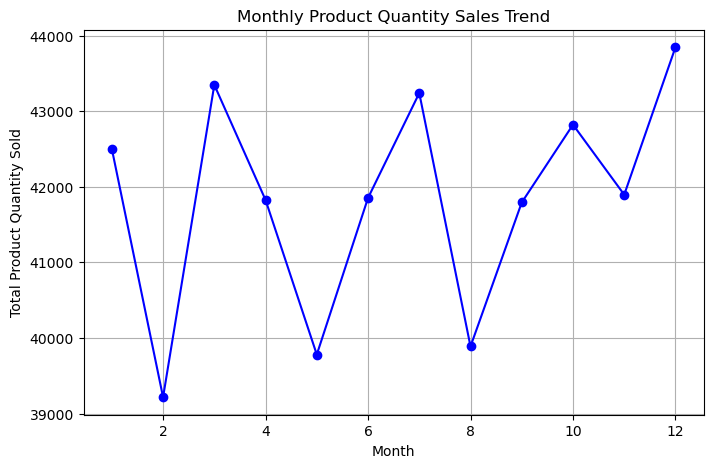

In [166]:
month_sales=df_transaction.groupby("month")["PROD_QTY"].sum()
plt.figure(figsize=(8, 5))
month_sales.plot(kind='line', marker='o', color='blue', linestyle='-')

plt.xlabel("Month")
plt.ylabel("Total Product Quantity Sold")
plt.title("Monthly Product Quantity Sales Trend")
plt.grid(True)

As we observe, the highest quantity of sales occurs in the months of March, July, October, and December.

Now we are going to analyse total sales on a year and monthly basis.

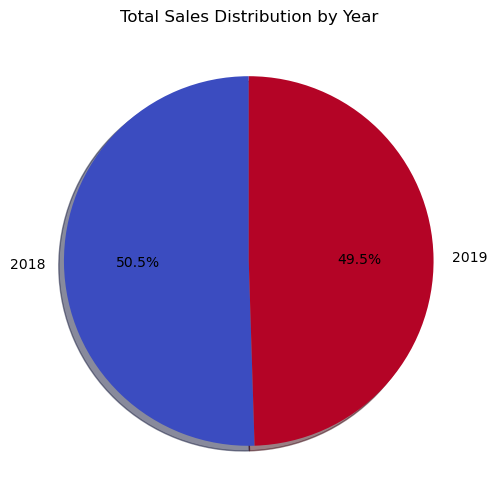

In [167]:
total_sales= df_transaction.groupby("year")["TOT_SALES"].sum()
plt.figure(figsize=(6, 6))
total_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', shadow=True)
plt.title("Total Sales Distribution by Year")
plt.ylabel('') 
plt.show()

# Total sales are highest in the year 2018.

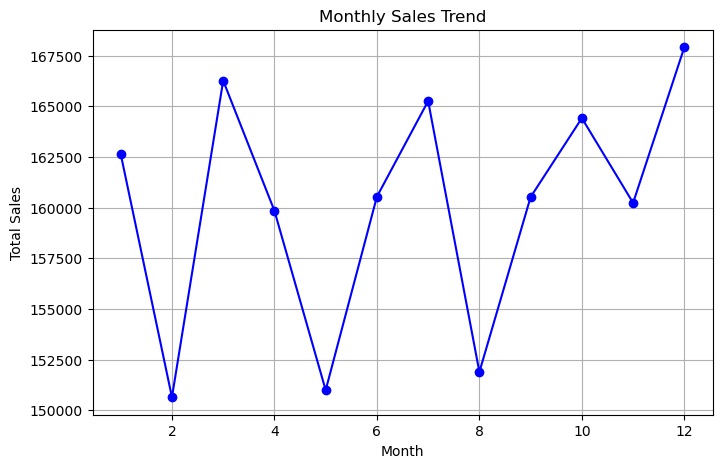

In [168]:
monthly_sales=df_transaction.groupby("month")["TOT_SALES"].sum()
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='line', marker='o', color='blue', linestyle='-')

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()

In [169]:
# Now analyse the final sales
df_transaction.groupby("year")["FINAL_SALES"].sum()

year
2018    1895455.00
2019    1856605.85
Name: FINAL_SALES, dtype: float64

Final sales is also high in the year 2018

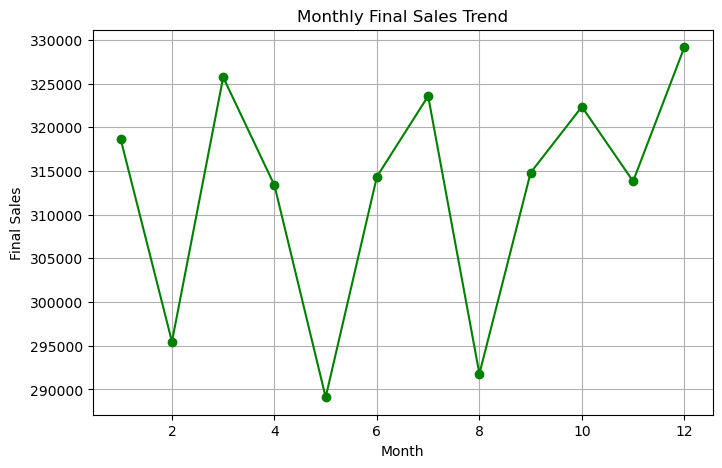

In [170]:
monthly_final_sales= df_transaction.groupby("month")["FINAL_SALES"].sum()
plt.figure(figsize=(8, 5))
monthly_final_sales.plot(kind='line', marker='o', color='green', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Final Sales")
plt.title("Monthly Final Sales Trend")
plt.grid(True)

# Final sales are highest in the months of March, July, October, and December.

# Checking the top five stores with the highest final sales.

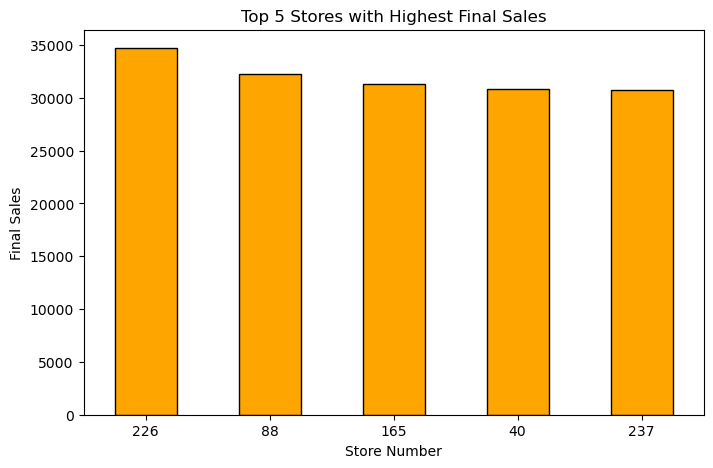

In [171]:
store_sales = df_transaction.groupby("STORE_NBR")["FINAL_SALES"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
store_sales.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel("Store Number")
plt.ylabel("Final Sales")
plt.title("Top 5 Stores with Highest Final Sales")
plt.xticks(rotation=0) 
plt.show()

# Store number 226 has the highest final sales, while store number 237 has the lowest final sales.

In [172]:
# Average final sales store wise
avg_store_sales = df_transaction.groupby("STORE_NBR")["FINAL_SALES"].mean().sort_values(ascending=False).head(5)
avg_store_sales

STORE_NBR
92     18.400000
26     17.520953
40     17.512045
96     17.511765
217    17.509229
Name: FINAL_SALES, dtype: float64

The average final sales for the top five stores (92, 217, 25, 235, and 40) are high.

# Let's analyze the top five products with the highest final sales.

In [173]:
top_product = df_transaction.groupby("PROD_NAME")["FINAL_SALES"].sum().sort_values(ascending=False).head(5)

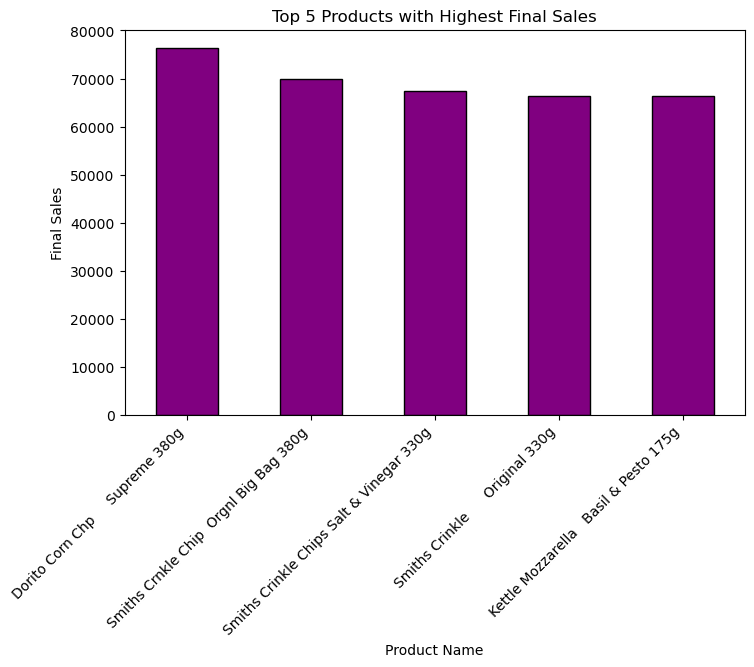

In [174]:
plt.figure(figsize=(8, 5))
top_product.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel("Product Name")
plt.ylabel("Final Sales")
plt.title("Top 5 Products with Highest Final Sales")
plt.xticks(rotation=45, ha='right')
plt.show()

# Now, we want to analyze final sales based on customer-wise data.

In [181]:
# Now we need to join trnasaction ans purchase table
new_table= pd.merge(df_transaction,df_purchase,on="LYLTY_CARD_NBR")


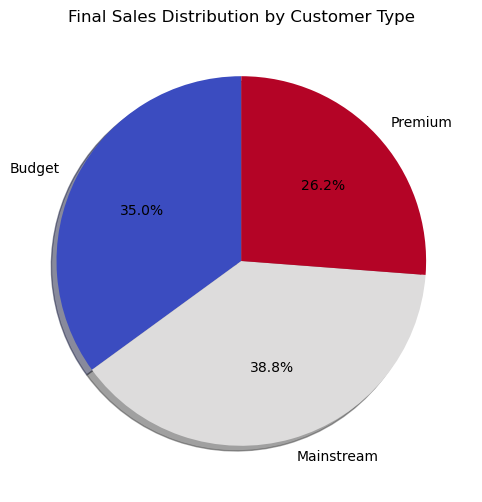

In [191]:
customer_wise_sales= new_table.groupby("PREMIUM_CUSTOMER")["FINAL_SALES"].sum()
plt.figure(figsize=(6, 6))
customer_wise_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', shadow=True)
plt.title("Final Sales Distribution by Customer Type")
plt.ylabel('')
plt.show()

# The final sales in the mainstream customer segment are higher compared to other segments.

In [192]:
new_table

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,FINAL_SALES,year,month,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,12.0,2018,10,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,18.9,2019,5,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,7.6,2018,11,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,2.1,2019,3,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5.8,2019,5,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264213,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,21.6,2019,3,YOUNG SINGLES/COUPLES,Premium
264214,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,4.4,2018,8,YOUNG SINGLES/COUPLES,Premium
264215,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,17.6,2018,11,YOUNG SINGLES/COUPLES,Premium
264216,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,15.6,2018,12,YOUNG SINGLES/COUPLES,Premium


In [ ]:
# Average final sales

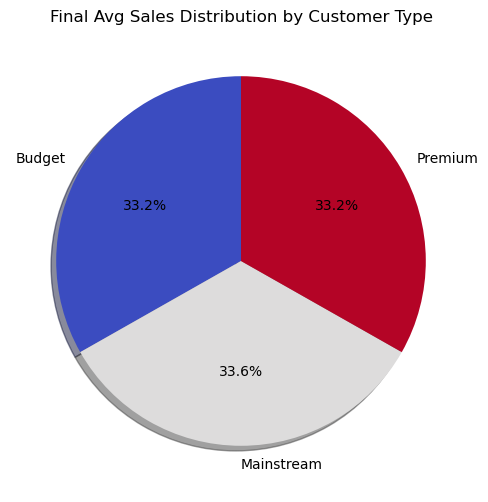

In [194]:
customer_wise_avg_sales= new_table.groupby("PREMIUM_CUSTOMER")["FINAL_SALES"].mean()
plt.figure(figsize=(6, 6))
customer_wise_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', shadow=True)
plt.title("Final Avg Sales Distribution by Customer Type")
plt.ylabel('')
plt.show()